# Is the score difference correlated with any variable
Here we introduce new variable score_diff = left_score - right_score.
The distribution of the score difference is unimodal centered near 0.

### Questions
- Is the person with leading score more likely to initiate? 
    - use general score difference (left - right)
    - H_e: if score_diff is large (left lead), more likely to have left initiation

### TODO: 
- **get numerical count(nonbinary) of scoring, plot that against initiation**
- test interactions between variables
- use stratified by who scored data
- debug attack location: coefficient too big wtf 

### back burner questions: 


In [79]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [108]:
# load data
touches = pd.read_csv('data/saber.csv')
# remove unnecessary columns: weapon_y, created_date, tournament_id, gfycat_gfy_id, fotl_name, fotr_name, download_url
touches=touches.drop(columns=['weapon_y', 'stats_id', 'created_date', 'tournament_id', 'gfycat_gfy_id', 
                              'fotl_name', 'fotr_name', 'download_url'])
touches_binary = pd.get_dummies(touches, prefix=['weapon', 'init', 'touch', 'stp_loc', 'bod_loc', 'gender'], 
                         columns=['weapon_x', 'initiated', 'touch', 'strip_location', 'body_location', 'gender'])

# get pre touch score difference 
touches_binary['left_score_pre'] = touches_binary.left_score - touches_binary.touch_left
touches_binary['right_score_pre'] = touches_binary.right_score - touches_binary.touch_right

# get numerical initialization count
touches_binary['init_num'] = touches_binary.init_fotl + touches_binary.init_fotr*-1

# get score difference column 'score_diff' and score difference column from scorer perspective 'scorer_lead'
touches_binary['score_diff_pre'] = touches_binary['left_score_pre'] - touches_binary['right_score_pre']
touches_binary['score_diff_post'] = touches_binary['left_score'] - touches_binary['right_score']
touches_binary['scorer_lead'] = touches_binary['score_diff_pre']
touches_binary.loc[touches_binary.touch_right == 1, 'scorer_lead'] = touches_binary.loc[touches_binary.touch_right == 1, 'scorer_lead']*-1

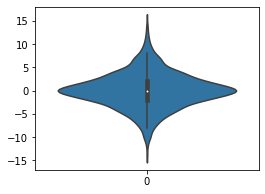

In [81]:
plt.figure(figsize=(4, 3))
sb.violinplot(touches_binary['score_diff'])
plt.show()

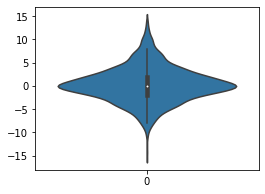

In [82]:
plt.figure(figsize=(4, 3))
sb.violinplot(touches_binary['scorer_lead'])
plt.show()

In [4]:
# further stratify by who scored the touch, this block is currently not in use
touches_bin_left_scr = touches_binary.loc[touches_binary['touch_left']==1]
touches_bin_right_scr = touches_binary.loc[touches_binary['touch_right']==1]

### Does attack initation relate to score difference
Variables involved: init_fotl, init_fotr, init_neither, score_diff

In [109]:
# specify which variable we are using as dependent variable, e.g. score_diff (left lead) or scorer_lead (scorer lead duh.)
df = touches_binary.copy()

In [114]:
#

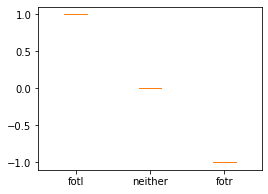

In [105]:

dep_var = 'score_diff_pre'

plt.figure(figsize=(4, 3))
plt.boxplot([df[dep_var].loc[df['init_fotl']==1],
             df[dep_var].loc[df['init_neither']==1],
             df[dep_var].loc[df['init_fotr']==1]],
           labels=['fotl', 'neither', 'fotr'])
plt.show()

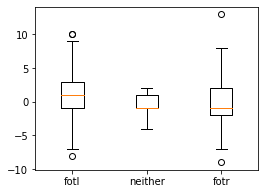

In [100]:
# specify which variable we are using as dependent variable, e.g. score_diff (left lead) or scorer_lead (scorer lead duh.)
df = touches_binary.copy()
dep_var = 'score_diff_post'

plt.figure(figsize=(4, 3))
plt.boxplot([df[dep_var].loc[df['init_fotl']==1],
             df[dep_var].loc[df['init_neither']==1],
             df[dep_var].loc[df['init_fotr']==1]],
           labels=['fotl', 'neither', 'fotr'])
plt.show()

In [97]:
X_data = df[['init_fotl', 'init_fotr', 'init_neither']]

X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    df[dep_var], shuffle=True, random_state=404, test_size=0.2)
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("coefficients", reg.coef_)
y_pred=reg.predict(X_test)
print("the mse on test set is", np.sum(np.power(y_test-y_pred, 2))/len(y_test))

intercept 0.43594009983361204
coefficients [-0.20974962 -0.14166217  0.3480599 ]
the mse on test set is 13.862439177233044


### Does attack location relate to score difference
Variables involved: stp_loc_fotl_warning_box, stp_loc_fotl_half, stp_loc_middle, stp_loc_fotr_half, stp_loc_fotr_warning_box, score_diff

In [95]:
df = touches_binary.copy()
dep_var = 'scorer_lead'

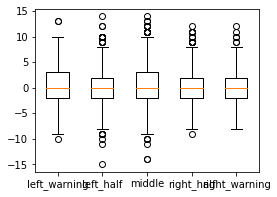

In [96]:
plt.figure(figsize=(4, 3))
plt.boxplot([df[dep_var].loc[df['stp_loc_fotl_warning_box']==1],
             df[dep_var].loc[df['stp_loc_fotl_half']==1],
             df[dep_var].loc[df['stp_loc_middle']==1],
             df[dep_var].loc[df['stp_loc_fotr_half']==1],
             df[dep_var].loc[df['stp_loc_fotr_warning_box']==1]],
           labels=['left_warning', 'left_half', 'middle', 'right_half', 'right_warning'])
plt.show()

In [62]:
X_data = df[['stp_loc_fotl_warning_box', 'stp_loc_fotl_half', 'stp_loc_middle', 
                         'stp_loc_fotr_half', 'stp_loc_fotr_warning_box']]

X_train, X_test, y_train, y_test = train_test_split(X_data, df[dep_var], 
                                                    shuffle=True, random_state=404, test_size=0.2)
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("coefficients", reg.coef_)
y_pred=reg.predict(X_test)
print("the mse on test set is", np.sum(np.power(y_test-y_pred, 2))/len(y_test))

intercept 1.3943661971830998
coefficients [-0.0576315  -0.33306352 -0.0283662  -0.28692818 -0.41023921]
the mse on test set is 13.948299087549806
